## spam Detection
**Spam detection** is a critical process that involves recognising and filtering out undesired or unsolicited communications, generally referred to as spam, from valid messages sent by email, text messaging, and social media postings.

The importance of spam detection stems from its capacity to safeguard users against potentially damaging and fraudulent messages such as phishing attempts and other sorts of frauds. Spam mail can also cause congested and unmanageable inboxes, leading users to be inconvenienced.

+ The research under consideration focuses on recognising spam or ham (legal messages) using SMS data. 
+ This project necessitates the analysis of SMS messages in order to uncover patterns and features that distinguish spam messages from authentic ones. 
+ Based on these similarities, the project's ultimate objective is to create a machine learning model that can reliably categorise incoming SMS messages as spam or ham.

This sort of project is critical since SMS texting is a common mode of communication, and spam messages may be a major issue. Creating an accurate spam detection model can assist consumers in avoiding potentially hazardous or undesired communications and improving their overall messaging experience.

### Project Pipeline
+ Data Cleaning.
+ EDA(Exploratory Data Analysis).
+ Text Preprocessing.
+ Model Building.
+ Model Evaluation.
+ Model Improvement.

In [1]:
# Importing the neccessary libraries to perform our tasks.
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('/Users/tarakram/Documents/SMS_Spam-Detection/Data/SMSSpamCollection.txt', sep ='\t',header = None)

In [3]:
data # Display Datset

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
print(data.columns)

Int64Index([0, 1], dtype='int64')


In [5]:
# The column Headings are missing, so we manually put these Headings.
data.rename(columns={0: 'target', 1: 'text'}, inplace = True)

In [6]:
data.head() # display the first 5 rows, with Headings.

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.shape

(5572, 2)

### Data Cleaning.
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# hurray!, There are no Null Values in our dataset.

In [11]:
data.duplicated().sum()

403

In [12]:
# There are 403 duplicate values in our dataset.

In [13]:
data[data.duplicated()]

,target,text
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [14]:
# droping Duplicates.
data.drop_duplicates(keep = 'first', inplace = True) # we are keeping first, only removing the duplicated one.

In [15]:
data.duplicated().sum()

0

In [16]:
# now there are no Duplicates in our data.

In [17]:
data.head(3) # Display first 3 rows

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [18]:
# I want to Encode the Target column like, ham : 0, and spam :1.

In [19]:
from sklearn.preprocessing import LabelEncoder
lab_encode = LabelEncoder() 
# we are importing LabelEncoder from sklearn and creating a object.

In [20]:
data['target'] = lab_encode.fit_transform(data['target'])
# we are using fit_transform to fit and transform the data into label encoder.

In [21]:
data.head(3) # Display First 3 rows.

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [22]:
data.shape

(5169, 2)

In [23]:
# this is our Data, which is ready for EDA.

### EDA(Exploratory Data Analysis)
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
+ with the help of EDA, we can understand the data much better.

In [24]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

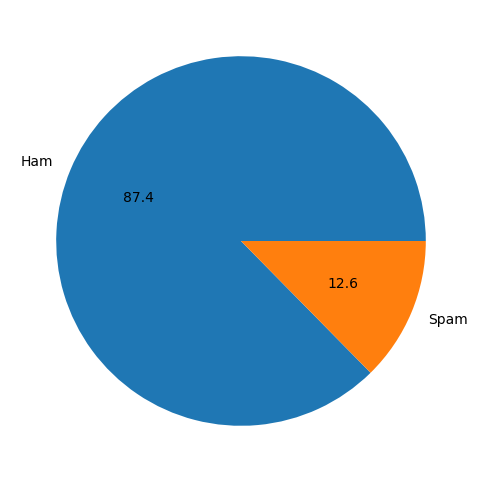

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,6))

plt.pie(data['target'].value_counts(), labels = ['Ham', 'Spam'], autopct= '%.1f')
plt.show()

we can clearly see that we have 4516(87.4%)-->ham-messages and 653(12.6%) --> spam messages. 
We are having a imbalance data.
+ To Deal with the imbalance data, we have under-sampling, over-sampling etc, but first we use the precision, recall to evaluate, based on the results, we can performs these methods.


In [26]:
# To get Deeper into this imbalanced Data.
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/tarakram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# lets find the length of the each row in the text column.
data['num_characters'] = data['text'].apply(len)

In [29]:
# Lets Fetch the number of words in the sentence.
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
# Lets find the length of the each sentences in the text column.
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
#lets reindex the target column at last to make it much easy to understand.
data = data.reindex(columns=['text', 'num_characters', 'num_words', 'num_sentences', 'target'])
data.head()

,text,num_characters,num_words,num_sentences,target
0,"Go until jurong point, crazy.. Available only ...",111,24,2,0
1,Ok lar... Joking wif u oni...,29,8,2,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1
3,U dun say so early hor... U c already then say...,49,13,1,0
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0


In [33]:
# Descriptive Statistics
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.591023,1.954924
std,58.437457,13.402840,1.366937
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
# Lets do for both ham and spam.

In [35]:
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.264836,1.806244
std,56.715046,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [36]:
# Here we can see, that on an Average the num_characters are 70, num_words are 17, and num_sentences are2


In [37]:
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.983155
std,29.821348,6.993008,1.489645
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [38]:
# Here we can see on a average of num_characters are 137, num_words are 27, num_sentences are 3.

From this analysis of Descriptive statistics, we can assume that the spam messages are tend to have more characters than the non-spam messages, and num-words, num_sentences for the same.

In [39]:
# Lets plot Histogram to Get Better understanding.

In [40]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

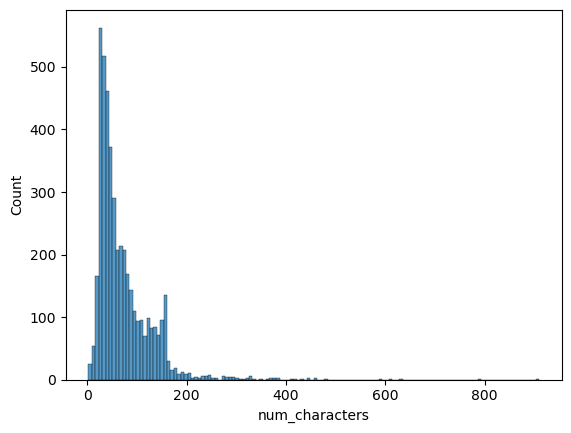

In [41]:
sns.histplot(data[data['target'] == 0]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

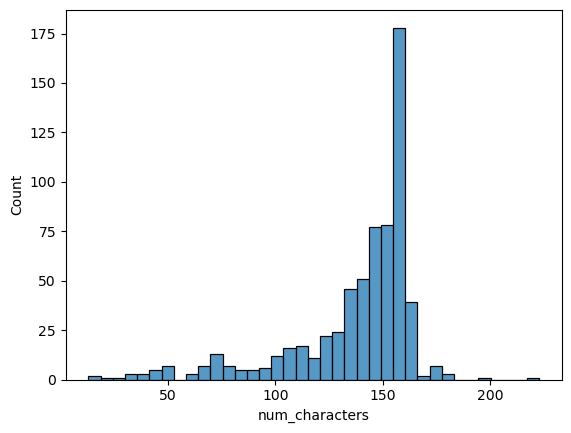

In [42]:
sns.histplot(data[data['target'] == 1]['num_characters'])

In [43]:
# Lets combine these two, and see the differnce.

<Axes: xlabel='num_characters', ylabel='Count'>

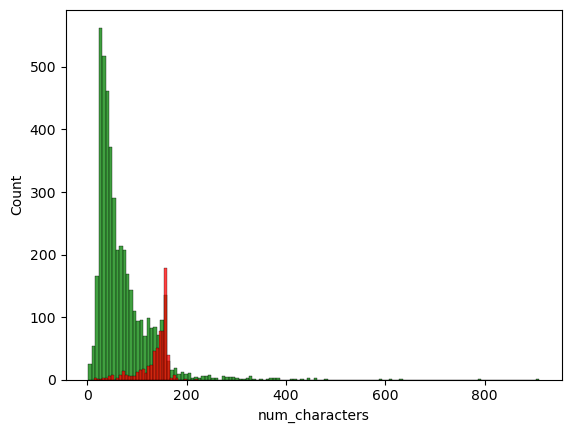

In [44]:
sns.histplot(data[data['target'] == 0]['num_characters'], color = 'green')
sns.histplot(data[data['target'] == 1]['num_characters'], color = 'red')

In [45]:
# you can see the spam messages has more num_characters when compared to non-spam messages.

<Axes: xlabel='num_words', ylabel='Count'>

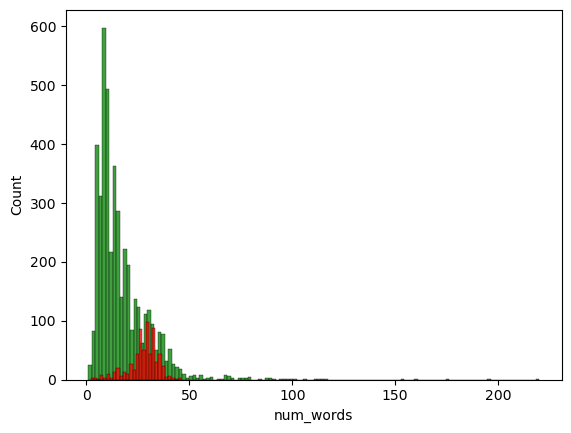

In [46]:
sns.histplot(data[data['target'] == 0]['num_words'], color = 'green')
sns.histplot(data[data['target'] == 1]['num_words'], color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

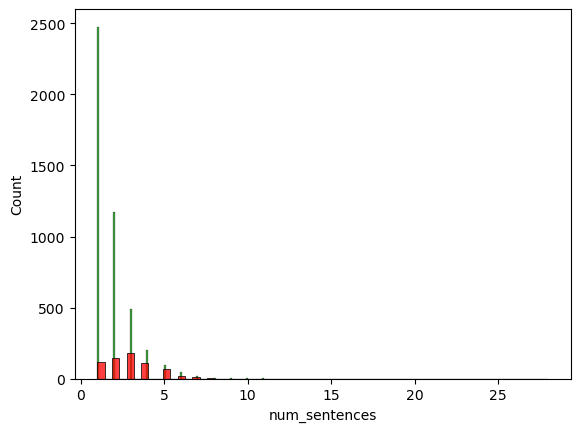

In [47]:
sns.histplot(data[data['target'] == 0]['num_sentences'], color = 'green')
sns.histplot(data[data['target'] == 1]['num_sentences'], color = 'red')

In [48]:
# we can find the some of the difference between the spam and non-spam messages.

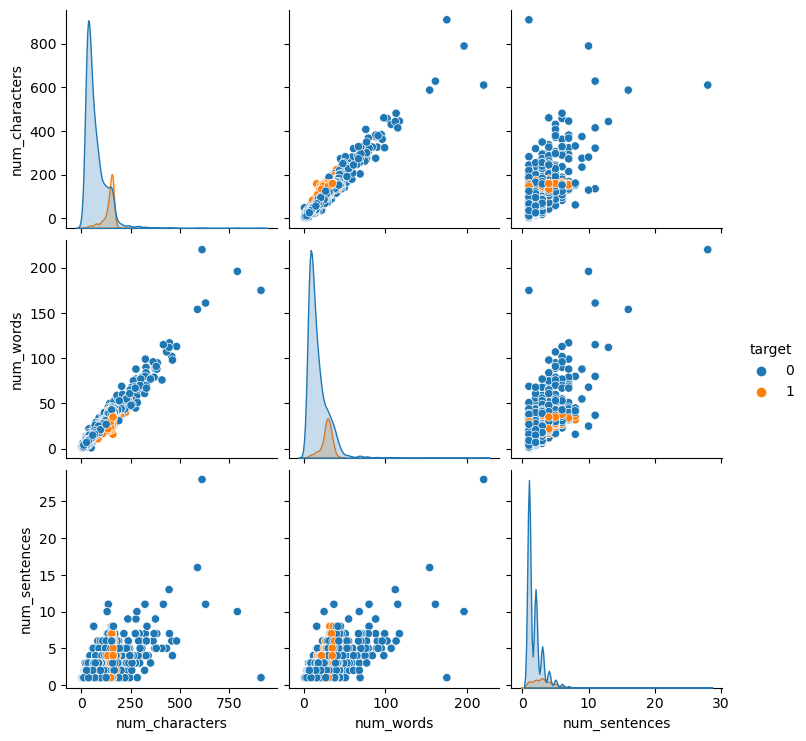

In [49]:
# lets see the relationship between each column.
sns.pairplot(data,hue = 'target') # where are changeing the color into target columns

In [50]:
# Lets see the correalation.
data.corr()

,num_characters,num_words,num_sentences,target
num_characters,1.000000,0.966012,0.636644,0.379791
num_words,0.966012,1.000000,0.682956,0.260238
num_sentences,0.636644,0.682956,1.000000,0.286064
target,0.379791,0.260238,0.286064,1.000000


<Axes: >

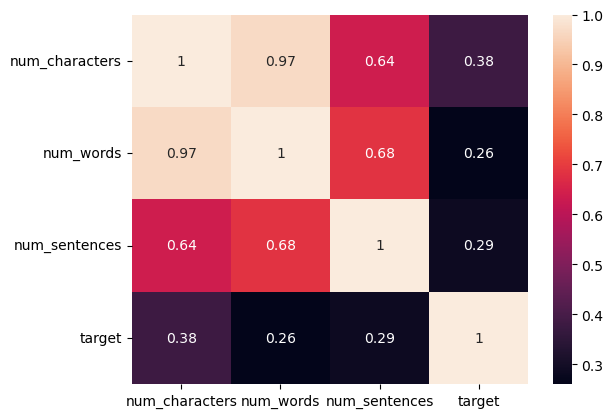

In [51]:
# Lets plot the Heatmap.
sns.heatmap(data.corr(),annot= True)

+ The num_characters has a high correlation with the num_words.
+ The num_characters has a moderate correlation with the num_sentences.
+ The num_words has a moderate correlation with the num_sentences.<br>
**Data set has  Multicolinearity**.<br>
So we will remove the remaining columns that are highly correlated, we will keep the num_characters, because it has high correaltion towards the Target.

In [52]:
# Now we have understand about the data, and their correlation, now the next step is data preprocessing.

### Data Preprocessing.

In [53]:
data.head()

,text,num_characters,num_words,num_sentences,target
0,"Go until jurong point, crazy.. Available only ...",111,24,2,0
1,Ok lar... Joking wif u oni...,29,8,2,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1
3,U dun say so early hor... U c already then say...,49,13,1,0
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0


Things that we can do in Pre-processing.<br>
+ Lower case all the words.
+ remove symbols, special characters.
+ Tokenization
+ Stop words.
+ applying Stemming or Lemmatisation<br>
These are the things that we generally do in any textual data.

In [54]:
data['text'] = data['text'].str.lower() # Convert the lowercase

In [55]:
data.head()

,text,num_characters,num_words,num_sentences,target
0,"go until jurong point, crazy.. available only ...",111,24,2,0
1,ok lar... joking wif u oni...,29,8,2,0
2,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,1
3,u dun say so early hor... u c already then say...,49,13,1,0
4,"nah i don't think he goes to usf, he lives aro...",61,15,1,0


In [56]:
data['text'] = data['text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True).str.split().apply(lambda x: ' '.join(x))
# Removing the special characters.

In [57]:
import string
string.punctuation # Removing the Punctuations also

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
data['text'] = data['text'].str.replace('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', regex=True).str.split().apply(lambda x: ' '.join(x))


In [59]:
data.tail()

,text,num_characters,num_words,num_sentences,target
5567,this is the 2nd time we have tried 2 contact u...,160,35,4,1
5568,will b going to esplanade fr home,36,9,1,0
5569,pity was in mood for that soany other suggestions,57,15,2,0
5570,the guy did some bitching but i acted like id ...,125,27,1,0
5571,rofl its true to its name,26,7,2,0


In [60]:
from nltk.corpus import stopwords
stop = stopwords.words('english') # Removing the stopwords, which doesn't add value for the meaning, they only used for sentence formation

In [61]:
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Stopwords<br>
these are the words that didn't add any value to the meaning, these are used for the sentence formation
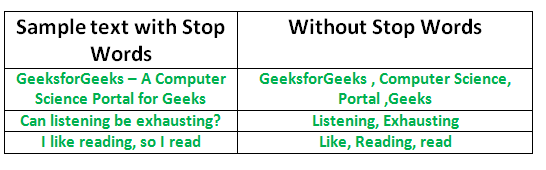

In [62]:
data.head()

,text,num_characters,num_words,num_sentences,target
0,go jurong point crazy available bugis n great ...,111,24,2,0
1,ok lar joking wif u oni,29,8,2,0
2,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2,1
3,u dun say early hor u c already say,49,13,1,0
4,nah dont think goes usf lives around though,61,15,1,0


But, here there is a problem that some of the words defining the same meaning for ex - ( change, changed, changes, changing ), these all are same meaning.so here we have to do stemming , so what is stemming?
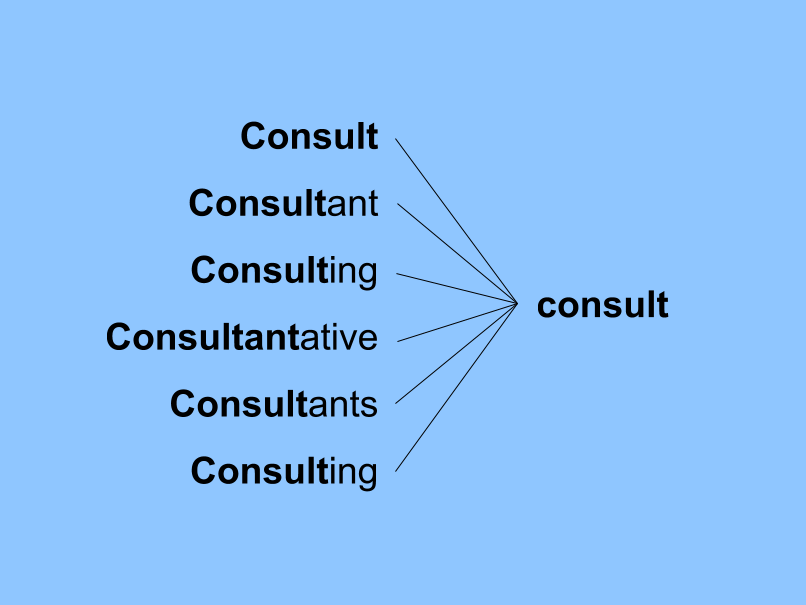

In [63]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [64]:
def stem(text): # defining a function that takes input and give stemmed output
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [65]:
data['text'] = data['text'].apply(stem) # applying the stemming into our column

In [66]:
#data['text'] = data['text'].astype(str).str.replace(r'[\[\],]', '', regex=True).str.split().apply(lambda x: ' '.join(x))


In [67]:
#data.head()

In [68]:
data['text'] = data['text'].apply(nltk.word_tokenize)# Convert into Tokens

tokenization<br>
Tokenization is splitting the input data into a sequence of meaningful parts
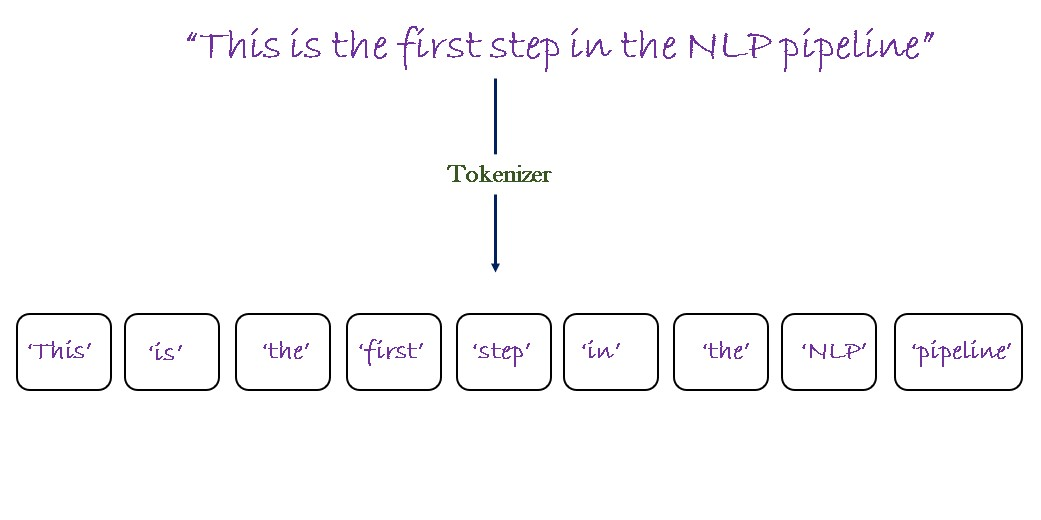

In [69]:
data

,text,num_characters,num_words,num_sentences,target
0,"[go, jurong, point, crazi, avail, bugi, n, gre...",111,24,2,0
1,"[ok, lar, joke, wif, u, oni]",29,8,2,0
2,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,37,2,1
3,"[u, dun, say, earli, hor, u, c, alreadi, say]",49,13,1,0
4,"[nah, dont, think, goe, usf, live, around, tho...",61,15,1,0
...,...,...,...,...,...
5567,"[2nd, time, tri, 2, contact, u, u, 750, pound,...",160,35,4,1
5568,"[b, go, esplanad, fr, home]",36,9,1,0
5569,"[piti, mood, soani, suggest]",57,15,2,0
5570,"[guy, bitch, act, like, id, interest, buy, som...",125,27,1,0


In [70]:
data['text'] = data['text'].astype(str).str.replace(r'[\[\],]','' , regex=True).str.split().apply(lambda x: ' '.join(x))
# Removing those commas and sqaure brackets

In [71]:
data.head(3) # Display the data

,text,num_characters,num_words,num_sentences,target
0,'go' 'jurong' 'point' 'crazi' 'avail' 'bugi' '...,111,24,2,0
1,'ok' 'lar' 'joke' 'wif' 'u' 'oni',29,8,2,0
2,'free' 'entri' '2' 'wkli' 'comp' 'win' 'fa' 'c...,155,37,2,1


In [72]:
data['text'] = data['text'].apply(lambda x: x.replace("'", "")) # Replacing the '', with no sign

In [73]:
data.head(3) # Display the data.

,text,num_characters,num_words,num_sentences,target
0,go jurong point crazi avail bugi n great world...,111,24,2,0
1,ok lar joke wif u oni,29,8,2,0
2,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2,1


In [74]:
# Now Our Dataset is Good, it is cleaned, it is stemmed, tokenized.

In [75]:
# Lets see what are the top words that are spam using Wordcloud.
from wordcloud import WordCloud
wc = WordCloud(width=1000, height= 1000, min_font_size= 10, background_color= 'black')

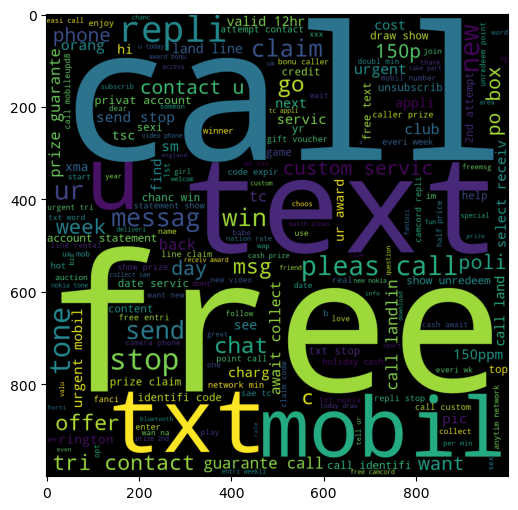

In [76]:
plt.figure(figsize = (12,6))
spam_wc = wc.generate(data[data['target'] == 1]['text'].str.cat(sep = ' '))
plt.imshow(spam_wc)

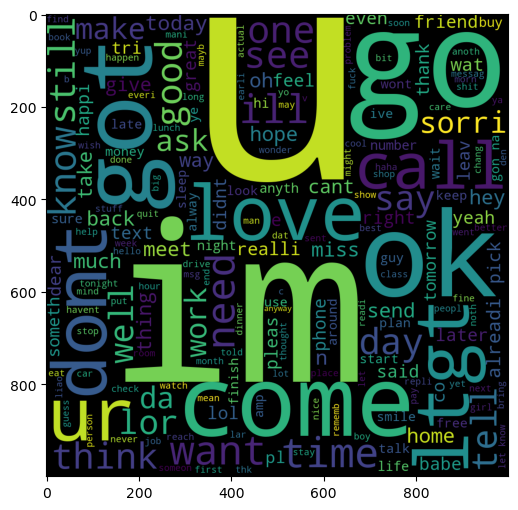

In [77]:
plt.figure(figsize = (12,6))
non_spam_wc = wc.generate(data[data['target'] == 0]['text'].str.cat(sep = ' '))
plt.imshow(non_spam_wc)

In [78]:
data[data['target'] == 1]['text'] # these are the spam words.

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back id like fun ...
8       winner valu network custom select receivea 900...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 20000 pound txt csh11 s...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get 250 pound free call credit detai...
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
Name: text, Length: 653, dtype: object

In [79]:
data[data['target'] == 0]['text'] # these are the non-spam words.

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: text, Length: 4516, dtype: object

In [80]:
spam_word = []
for msg in data[data['target'] == 1]['text'].to_list():
    for word in msg.split():
        spam_word.append(word)

In [81]:
len(spam_word)

10840

In [82]:
from collections import Counter # importing the library
spam_words = pd.DataFrame(Counter(spam_word).most_common(50)) # taking top 50 words

In [83]:
spam_words.head()

,0,1
0,call,321
1,free,188
2,2,155
3,txt,137
4,u,123


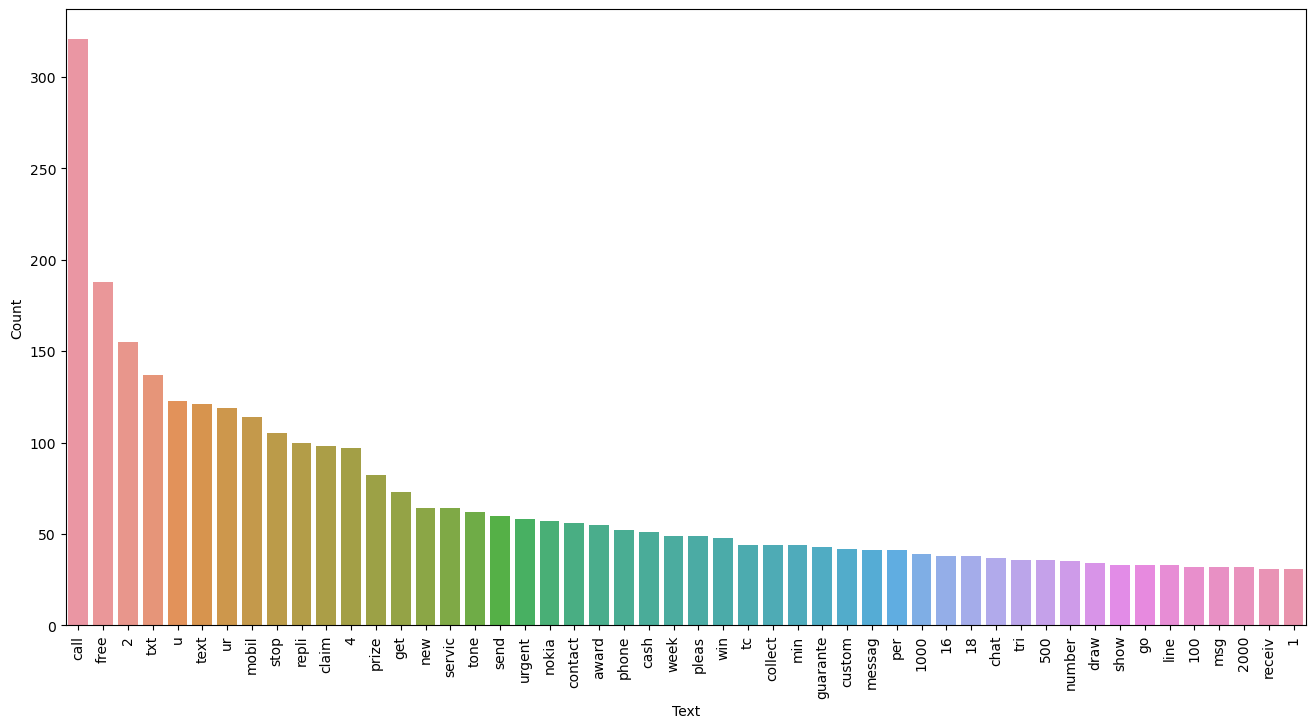

In [84]:
plt.figure(figsize=(16,8))
sns.barplot(data=spam_words, x=0, y=1)
plt.xticks(rotation = 'vertical')
plt.xlabel('Text')
plt.ylabel('Count')
plt.show()

In [85]:
# Call and Free are the top spam Words.

In [86]:
# same will do with the Non-spam words

In [87]:
non_spam_word = []
for msg in data[data['target'] == 0]['text'].to_list():
    for word in msg.split():
        non_spam_word.append(word)

In [88]:
len(non_spam_word)

37148

In [89]:
from collections import Counter # importing the library
non_spam_words = pd.DataFrame(Counter(non_spam_word).most_common(50)) # taking top 50 words

In [90]:
non_spam_words.head()

,0,1
0,u,891
1,im,446
2,go,404
3,get,352
4,2,292


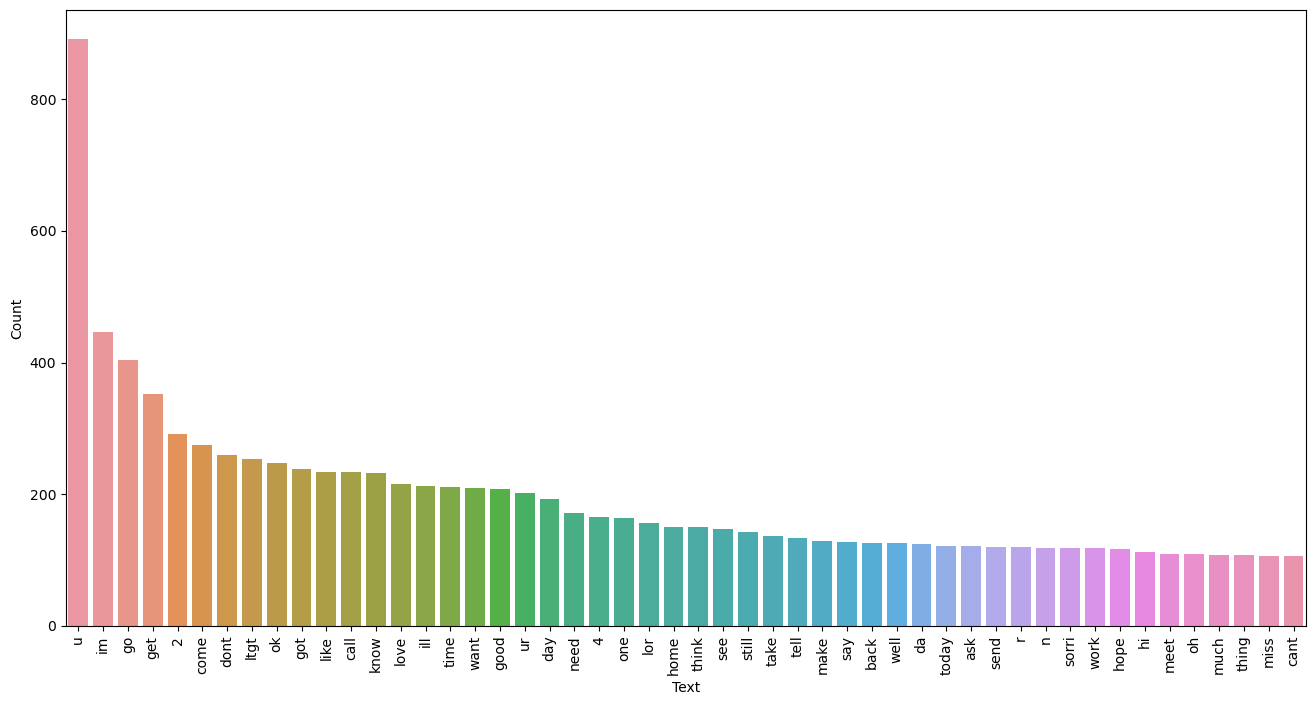

In [91]:
plt.figure(figsize=(16,8))
sns.barplot(data=non_spam_words, x=0, y=1)
plt.xticks(rotation = 'vertical')
plt.xlabel('Text')
plt.ylabel('Count')
plt.show()

In [92]:
# u and i'm are the top non-spam words.

In [93]:
# Now Our Dataset is ready for the model Building.
# The first step we have to do is research about the model which works well in the textual dta.

In [94]:
# Based on the Research Generally we use Bayesian Model to classify spam or not-spam.
# we can Also Use the SVM - Support Vector Machine.
# We will look into once we go forward.

### Model Building.

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [96]:
X = cv.fit_transform(data['text']).toarray()

In [97]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [98]:
X.shape

(5169, 8079)

In [99]:
y = data['target'].values

In [100]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [101]:
y.shape

(5169,)

In [102]:
# Now, WE have both X and y.

In [103]:
from sklearn.model_selection import train_test_split as tts

In [104]:
X_train, X_test,y_train, y_test = tts(X,y,test_size= 0.2, random_state=2)

In [105]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB # we are importing three libraries, we dont know which works better.
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [106]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

**Understand the confusion Matrix**<br>
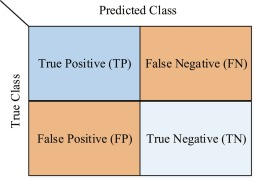

Accuracy Score: 0.8713733075435203
Precision Score: 0.4840182648401826


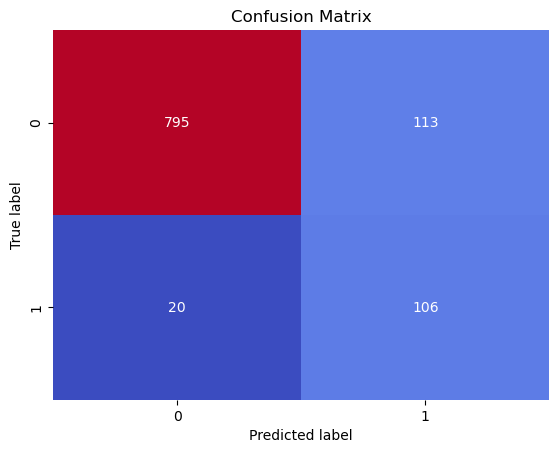

In [107]:
# Guassian Navie Bayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(f'Accuracy Score:',accuracy_score(y_test, y_pred1))
print(f'Precision Score:',precision_score(y_test,y_pred1))
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Here is the Accuracy Score is not Good, and also the main Precision is Wrost which is less than 50%, our model is not performing well here in the Guassian Navie Bayes

Accuracy Score: 0.9709864603481625
Precision Score: 0.8809523809523809


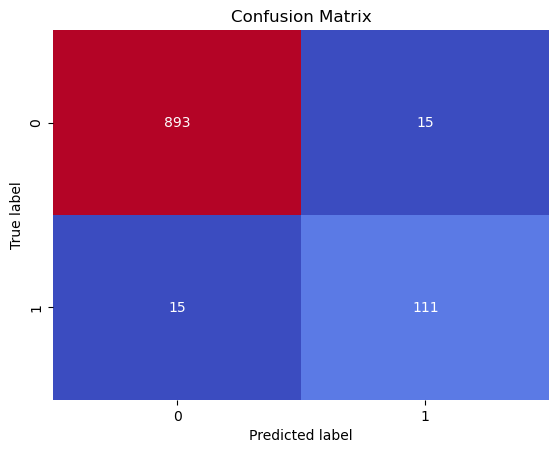

In [108]:
# Multinomial Navie Bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(f'Accuracy Score:',accuracy_score(y_test, y_pred2))
print(f'Precision Score:',precision_score(y_test,y_pred2))
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Here the Accuracy is improved, but Still the Precision not yet that much Good, Since we are dealing with the imbalanced Data, precision plays an important role than the Accuracy, so here also our model is good, but not performing as we expected.

Accuracy Score: 0.9632495164410058
Precision Score: 0.9313725490196079


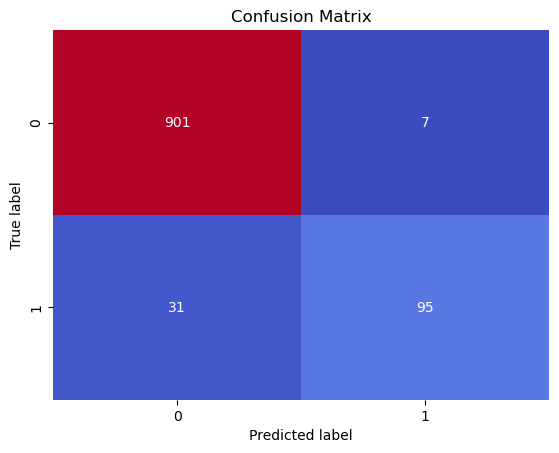

In [109]:
# Bernoualli Navie Bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(f'Accuracy Score:',accuracy_score(y_test, y_pred3))
print(f'Precision Score:',precision_score(y_test,y_pred3))
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Here the Accuracy Score a bit decreased and the precision Score is Good when compared to other models, but we cannot say this is the best model. we can improve our model by using some of the changes like using the Tfidf Vectorizer

**Lets apply TfidfVectorizer to our data.( the code is almost same as Above)**

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000) # We have to do trail and error until we get best values

In [111]:
X = tfidf.fit_transform(data['text']).toarray()

In [112]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
X.shape

(5169, 3000)

In [114]:
y = data['target'].values

In [115]:
y 

array([0, 0, 1, ..., 0, 0, 0])

In [116]:
y.shape

(5169,)

In [117]:
X_train1, X_test1, y_train1, y_test1 = tts(X,y,test_size= 0.2, random_state= 42)

Accuracy Score: 0.8733075435203095
Precision Score: 0.5189873417721519


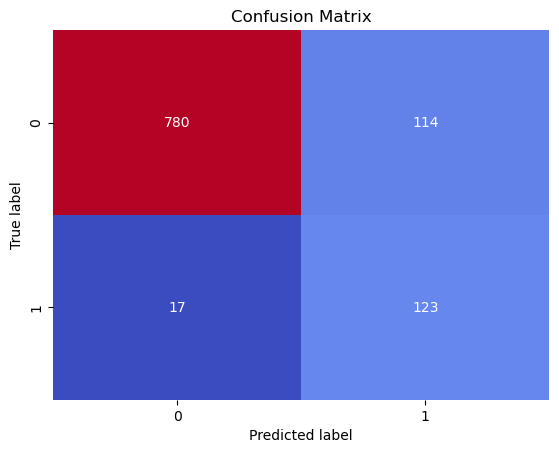

In [118]:
# Guassian Navie Bayes
gnb.fit(X_train1,y_train1)
y_pred1 = gnb.predict(X_test1)
print(f'Accuracy Score:',accuracy_score(y_test1, y_pred1))
print(f'Precision Score:',precision_score(y_test1,y_pred1))
cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy Score: 0.97678916827853
Precision Score: 1.0


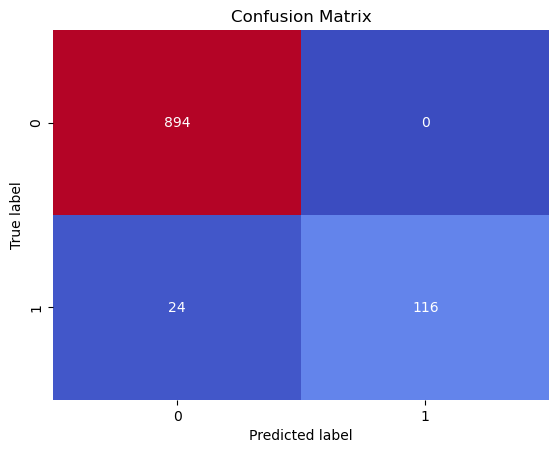

In [119]:
# Multinomial Navie Bayes
mnb.fit(X_train1,y_train1)
y_pred1 = mnb.predict(X_test1)
print(f'Accuracy Score:',accuracy_score(y_test1, y_pred1))
print(f'Precision Score:',precision_score(y_test1,y_pred1))
cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy Score: 0.9854932301740812
Precision Score: 1.0


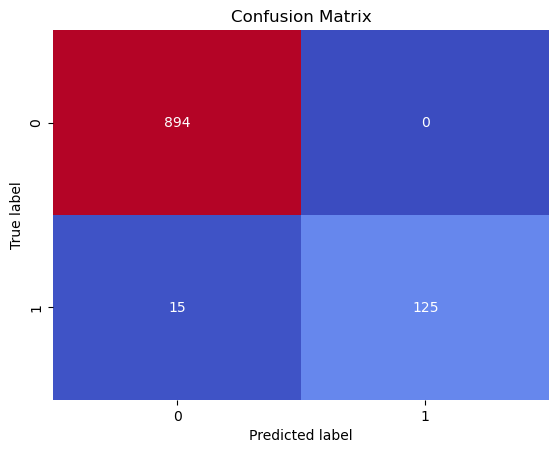

In [120]:
# Bernoulli Navie Bayes
bnb.fit(X_train1,y_train1)
y_pred1 = bnb.predict(X_test1)
print(f'Accuracy Score:',accuracy_score(y_test1, y_pred1))
print(f'Precision Score:',precision_score(y_test1,y_pred1))
cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

After applying the TfidfCountVectorizer, our model Performance Increased dramasticly.<br>
So we can say that **Bernoulli Navie Bayes** is best performing model to our dataset.<br>
Wait!, Lets try the other models and see their performance.

In [121]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [122]:
# Lets import All the models and test.(sklearn is helping a lot)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [123]:
# Creating a Object for Each Model.
lg = LogisticRegression(solver='liblinear', penalty = 'l1')
svc = SVC(kernel='sigmoid', gamma= 1.0)
dtc = DecisionTreeClassifier(max_depth= 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators= 50, random_state= 42)
abc = AdaBoostClassifier(n_estimators= 50, random_state= 42)
bc = BaggingClassifier(n_estimators= 50, random_state= 42)
etc = ExtraTreesClassifier(n_estimators= 50, random_state=42)
gbc = GradientBoostingClassifier(n_estimators= 50, random_state=42)
xgbc = XGBClassifier(n_estimators = 50, random_state = 42)

+ LogisticRegression: Logistic Regression is a type of linear model that works by finding the weights that maximize the likelihood of the data given the class. The solver parameter specifies the algorithm used to find the weights, and the penalty parameter specifies the type of regularization (e.g., l1, l2, etc.) applied to the weights.
+ SVC: Support Vector Classifier is a type of linear model that works by finding the best hyperplane that separates the classes. The kernel parameter specifies the type of kernel function to be used for the hyperplane (e.g., linear, poly, rbf, sigmoid, etc.), and the gamma parameter controls the width of the kernel.
+ MultinomialNB: Naive Bayes is a probabilistic classification algorithm that works by computing the probability of each class given the input features and selecting the class with the highest probability. The MultinomialNB variant is used for discrete data (e.g., text classification), while GaussianNB is used for continuous data. There are no major parameters to set for this model.
+ DecisionTreeClassifier: Decision Trees is a type of recursive partitioning algorithm that works by finding the feature that best splits the data into two subsets based on some criterion (e.g., information gain, Gini impurity, etc.). The max_depth parameter specifies the maximum depth of the tree.
+ KNeighborsClassifier: K-Nearest Neighbors is a non-parametric classification algorithm that works by finding the k closest points in the training set to the test point and predicting the class based on the majority of the k-nearest points. The default n_neighbors parameter is 5, but it can be changed to any integer value.
+ RandomForestClassifier: Random Forest is an ensemble learning algorithm that works by building multiple decision trees and aggregating their predictions. The n_estimators parameter specifies the number of trees to build.

+ AdaBoostClassifier: AdaBoost is an ensemble learning algorithm that works by iteratively training weak classifiers and assigning weights to the training samples based on their misclassification rate. The n_estimators parameter specifies the number of weak classifiers to train.

+ BaggingClassifier: Bagging is an ensemble learning algorithm that works by training multiple models on random subsets of the training data and aggregating their predictions. The n_estimators parameter specifies the number of models to train.

+ ExtraTreesClassifier: Extra Trees is an ensemble learning algorithm that works by building multiple decision trees and aggregating their predictions, similar to Random Forest. The difference is that Extra Trees chooses random splits for each node, rather than optimizing the splits based on some criterion.

+ GradientBoostingClassifier: Gradient Boosting is an ensemble learning algorithm that works by training weak classifiers and then adjusting the weights of the training samples based on their residual error. The n_estimators parameter specifies the number of weak classifiers to train.

+ XGBClassifier: XGBoost is an optimized version of Gradient Boosting that uses a different algorithm to compute the gradients and hessians for the loss function. The n_estimators parameter specifies the number of weak classifiers to train, and the random_state parameter sets the seed for the random number generator for reproducibility.



In [124]:
# Creating a Dictionary for the models.
clfs = {
    'Support_vector_classifier' : svc,
    'K_neighbours': knc,
    'Decision_tree': dtc,
    'Logistic_Regression' : lg,
    'Random_Forest': rfc,
    'AdaBoost': abc,
    'Bagging_classifier' : bc,
    'Extra_tree_classifier': etc,
    'Gradient_b_classifier' : gbc,
    'XGBoost' : xgbc
}

In [125]:
# Creating a function to train the models.
def train_classifier(clf,X_train, X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision

In [126]:
a_scores = []
p_scores = []
for name, clf in clfs.items():
    i,j = train_classifier(clf,X_train,X_test,y_train,y_test)
    print('For - ',name)
    print('Accuracy_score - ',i)
    print('Precision_score - ',j)
    print('-------------')
    a_scores.append(i)
    p_scores.append(j)

For -  Support_vector_classifier
Accuracy_score -  0.9274661508704062
Precision_score -  0.7007874015748031
-------------
For -  K_neighbours
Accuracy_score -  0.9197292069632496
Precision_score -  1.0
-------------
For -  Decision_tree
Accuracy_score -  0.9216634429400387
Precision_score -  0.9090909090909091
-------------
For -  Logistic_Regression
Accuracy_score -  0.9748549323017408
Precision_score -  0.9807692307692307
-------------
For -  Random_Forest
Accuracy_score -  0.9642166344294004
Precision_score -  0.989010989010989
-------------
For -  AdaBoost
Accuracy_score -  0.9661508704061895
Precision_score -  0.9174311926605505
-------------
For -  Bagging_classifier
Accuracy_score -  0.9622823984526112
Precision_score -  0.9484536082474226
-------------
For -  Extra_tree_classifier
Accuracy_score -  0.9709864603481625
Precision_score -  1.0
-------------
For -  Gradient_b_classifier
Accuracy_score -  0.9429400386847195
Precision_score -  0.958904109589041
-------------
For -  XG

In [127]:
perform_df = pd.DataFrame({'Algorithm' : clfs.keys(),'Accuracy': a_scores,'Precision': p_scores}).sort_values('Precision',ascending = False)


In [128]:
perform_df

,Algorithm,Accuracy,Precision
1,K_neighbours,0.919729,1.000000
7,Extra_tree_classifier,0.970986,1.000000
9,XGBoost,0.971954,0.989899
4,Random_Forest,0.964217,0.989011
3,Logistic_Regression,0.974855,0.980769
8,Gradient_b_classifier,0.942940,0.958904
6,Bagging_classifier,0.962282,0.948454
5,AdaBoost,0.966151,0.917431
2,Decision_tree,0.921663,0.909091
0,Support_vector_classifier,0.927466,0.700787


### Model Improvement.

In [129]:
# We can improve the model by chaging the max_features parameter of TfidfVectorizer.

In [130]:
changed_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':a_scores,'Precision_max_ft_3000':p_scores}).sort_values('Precision_max_ft_3000',ascending=False)
                                                                                                                                                                                                                                            

In [131]:
changed_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,K_neighbours,0.919729,1.000000
7,Extra_tree_classifier,0.970986,1.000000
9,XGBoost,0.971954,0.989899
4,Random_Forest,0.964217,0.989011
3,Logistic_Regression,0.974855,0.980769
8,Gradient_b_classifier,0.942940,0.958904
6,Bagging_classifier,0.962282,0.948454
5,AdaBoost,0.966151,0.917431
2,Decision_tree,0.921663,0.909091
0,Support_vector_classifier,0.927466,0.700787


In [132]:
new_df = perform_df.merge(changed_df,on='Algorithm')

In [133]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,K_neighbours,0.919729,1.000000,0.919729,1.000000
1,Extra_tree_classifier,0.970986,1.000000,0.970986,1.000000
2,XGBoost,0.971954,0.989899,0.971954,0.989899
3,Random_Forest,0.964217,0.989011,0.964217,0.989011
4,Logistic_Regression,0.974855,0.980769,0.974855,0.980769
5,Gradient_b_classifier,0.942940,0.958904,0.942940,0.958904
6,Bagging_classifier,0.962282,0.948454,0.962282,0.948454
7,AdaBoost,0.966151,0.917431,0.966151,0.917431
8,Decision_tree,0.921663,0.909091,0.921663,0.909091
9,Support_vector_classifier,0.927466,0.700787,0.927466,0.700787


Voting Classifier, WE gonna vote for the top performing Algorithms based on the Accuracy and Precision.
+ Extra_tree_classifier.
+ XGBoost
+ k_neigbours

In [134]:
xgbc = XGBClassifier(n_estimators = 50, random_state = 42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
mnb = MultinomialNB()
# We are Taking the top performing models.


In [135]:
# voting_classifier.

In [136]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('XGBC', xgbc),('ETC',etc),('KNC',knc),('BNB',bnb),('MNB',mnb)],voting='soft')

In [137]:
voting.fit(X_train,y_train) # fitting the voting classfier

VotingClassifier(estimators=[('XGBC',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_r...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('KNC', KNeighborsClassifier()),
                             ('BNB', BernoulliNB()), ('MNB', MultinomialNB())],
                 voting='soft')

In [138]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred)) # Predicting the Accuracy and precision Scores.

Accuracy 0.9748549323017408
Precision 1.0


In [139]:
# Applying stacking
estimators=[('XGBC', xgbc),('ETC',etc),('KNC',knc),('BNB',bnb)]
final_estimator=RandomForestClassifier()

In [140]:
from sklearn.ensemble import StackingClassifier # Importing Stacking Classifier.

In [141]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [142]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred)) # Predicting after Stacking

Accuracy 0.9796905222437138
Precision 0.9565217391304348


In [143]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb')) # Saving the models into pickle files.

*Future Work* - 
+ We can improve the model performance by undersampling or oversampling the data.
+ We can use other vectorizers.
+ We can Deploy this model into Production.

**THE END**